#Multi-Class Classification


In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
from tensorflow import keras



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/Group_03_3rd Module/Studio/Colab Notebooks/70000 ROWS_distance.csv')
print(data)

       NODES X CO  NODES Y CO  EMPTY SPACE ID   DISTANCE
0       36.790779   -1.316243               7  15.802902
1       36.790542   -1.314240             135  28.235236
2       36.790345   -1.315294              50   2.171157
3       36.791030   -1.315581              83  10.571200
4       36.790145   -1.314685              76  17.714244
...           ...         ...             ...        ...
76280   36.800161   -1.316881             835   8.992523
76281   36.797932   -1.318668             441   3.839594
76282   36.800193   -1.317485             760  40.675192
76283   36.798481   -1.318802             493  15.431110
76284   36.799813   -1.316964             782  23.630372

[76285 rows x 4 columns]


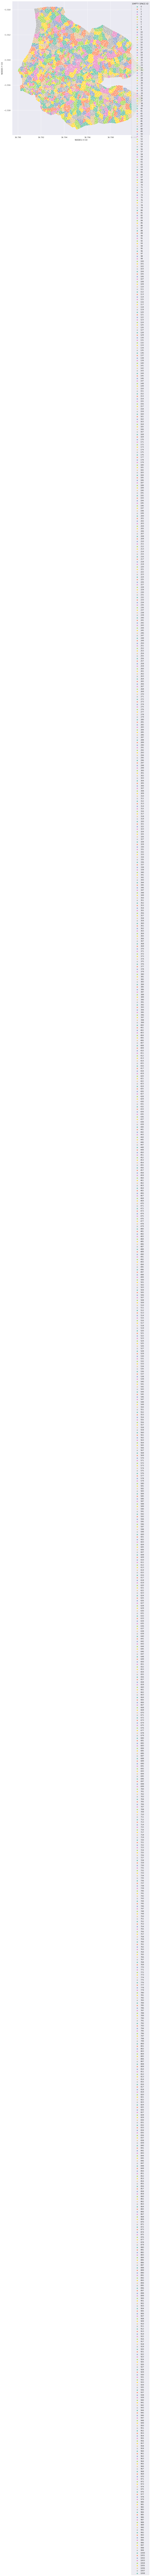

In [ ]:
#Look at data
import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 15)
sns.scatterplot(x="NODES X CO", y="NODES Y CO", hue="EMPTY SPACE ID", data=data, s=60, palette="Set2")
fig.show()

##Prepare Data

**ENCODING**

In [ ]:
data.columns = ['x', 'y', 'id', "dis"]
data.head(15)

,x,y,id,dis
0,36.790779,-1.316243,7,15.802902
1,36.790542,-1.314240,135,28.235236
2,36.790345,-1.315294,50,2.171157
3,36.791030,-1.315581,83,10.571200
4,36.790145,-1.314685,76,17.714244
5,36.791270,-1.316084,75,12.131325
6,36.790638,-1.314673,153,13.037382
7,36.790436,-1.315748,38,14.517786
8,36.790761,-1.315133,92,17.625736
9,36.790490,-1.316029,1,20.307557


In [ ]:
# Transform into a categorical variable
data.id = pd.Categorical(data.id)

# Assign a number to each category (label encoding)
data.id = data.id.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',data.head())
data.head(10)

Label encoded competitors: 
            x         y   id        dis
0  36.790779 -1.316243    7  15.802902
1  36.790542 -1.314240  135  28.235236
2  36.790345 -1.315294   50   2.171157
3  36.791030 -1.315581   83  10.571200
4  36.790145 -1.314685   76  17.714244


,x,y,id,dis
0,36.790779,-1.316243,7,15.802902
1,36.790542,-1.314240,135,28.235236
2,36.790345,-1.315294,50,2.171157
3,36.791030,-1.315581,83,10.571200
4,36.790145,-1.314685,76,17.714244
5,36.791270,-1.316084,75,12.131325
6,36.790638,-1.314673,153,13.037382
7,36.790436,-1.315748,38,14.517786
8,36.790761,-1.315133,92,17.625736
9,36.790490,-1.316029,1,20.307557


In [ ]:
!pip install np_utils

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=b8ab61b65392af592db7afb6c5ddd3b219566f2655c0a46adcc46f2e703cbda9
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [ ]:
#now we generate onhot vectors

# Import to_categorical from keras utils module
from keras.utils.np_utils import to_categorical

coordinates = data.drop(['id'], axis=1)
# Use to_categorical on your labels
id = to_categorical(data.id)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',id)

One-hot encoded competitors: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
#same code as last time

#declare features
X = data.iloc[:,0:2]
print(X)
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)
print(X_scaled)

#declare targets "classes"
y = id

#save the scaler for later use
from sklearn.externals import joblib
scaler_filename = "scalerX_classification.save"
joblib.dump(scalerX, scaler_filename) 


               x         y
0      36.790779 -1.316243
1      36.790542 -1.314240
2      36.790345 -1.315294
3      36.791030 -1.315581
4      36.790145 -1.314685
...          ...       ...
76280  36.800161 -1.316881
76281  36.797932 -1.318668
76282  36.800193 -1.317485
76283  36.798481 -1.318802
76284  36.799813 -1.316964

[76285 rows x 2 columns]
[[-1.72679602 -0.58288192]
 [-1.81741616  0.38567286]
 [-1.89274177 -0.12399101]
 ...
 [ 1.87277383 -1.18345358]
 [ 1.21816754 -1.82029164]
 [ 1.72747571 -0.93152296]]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['scalerX_classification.save']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 

print(X_train.shape)
print(y_train.shape)

(61028, 2)
(61028, 1009)


#Build model

From the cheatSheet
Multiclass classification >> 
      activation = relu for hidden layers / softmax for final layer
      loss = categorical cross entropy
      optimizer = adam
      input from data, is 2 columns
      output is 1 out of 4 classes

In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
  
# Add layers
model.add(tf.keras.layers.Dense(512, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(512, input_shape=(2,), activation='relu'))

  
# Add a dense layer with as many neurons as competitors
model.add(tf.keras.layers.Dense(1009, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1009)              517617    
Total params: 781,809
Trainable params: 781,809
Non-trainable params: 0
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.1)

Epoch 1/300
1717/1717 [==============================] - 19s 11ms/step - loss: 3.3180 - accuracy: 0.2065 - val_loss: 2.0944 - val_accuracy: 0.3484
Epoch 2/300
1717/1717 [==============================] - 18s 11ms/step - loss: 1.8066 - accuracy: 0.4106 - val_loss: 1.6219 - val_accuracy: 0.4375
Epoch 3/300
1717/1717 [==============================] - 19s 11ms/step - loss: 1.4828 - accuracy: 0.4858 - val_loss: 1.4110 - val_accuracy: 0.4955
Epoch 4/300
1717/1717 [==============================] - 19s 11ms/step - loss: 1.3059 - accuracy: 0.5334 - val_loss: 1.2504 - val_accuracy: 0.5489
Epoch 5/300
1717/1717 [==============================] - 19s 11ms/step - loss: 1.1949 - accuracy: 0.5631 - val_loss: 1.1193 - val_accuracy: 0.5877
Epoch 6/300
1717/1717 [==============================] - 19s 11ms/step - loss: 1.1158 - accuracy: 0.5876 - val_loss: 1.1220 - val_accuracy: 0.5676
Epoch 7/300
1717/1717 [==============================] - 20s 11ms/step - loss: 1.0577 - accuracy: 0.6077 - val_loss: 1

In [ ]:
import matplotlib.pyplot as plt

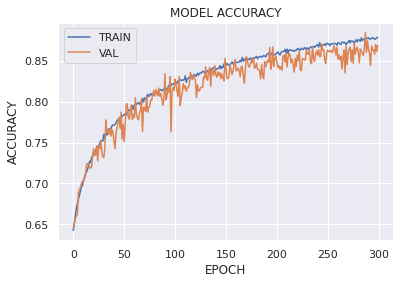

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAIN', 'VAL'], loc='upper left')
plt.show()

#Evaluate model on test data

In [ ]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test,y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

477/477 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8701
Accuracy: 0.8700923919677734


##Plot results

To draw a confusion matrix, we would need to go back from onehot encoding to class, we do that with .argmax method which finds which column has the highest score

In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

In [ ]:
model.save('STUDIO-ML_CATEGORIZATION_MODEL_V1.h5')